## Estadística Aplicada
Sesión 7 - 5 septiembre

Joel Fayam Rivera Peña 2076323

Grupo 42

In [ ]:
## Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
## Librerías específicas
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter
from lifelines import KaplanMeierFitter

In [ ]:
## Datos
Quiebra=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/quiebra.csv')

In [ ]:
Quiebra.head()

,tiempo,mujer,quebrar
0,21,0,1
1,16,1,0
2,26,1,1
3,17,1,0
4,29,1,1


## Modelo exponencial

In [ ]:
# Ajuste un modelo de supervivencia exponencial
M_Exp=ExponentialFitter().fit(Quiebra['tiempo'],Quiebra['quebrar'])

In [ ]:
M_Exp.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 100 total observations, 52 right-censored observations>
   number of observations = 100
number of events observed = 48
           log-likelihood = -212.48
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  30.77       4.44            22.07            39.48

          cmp to    z      p   -log2(p)
lambda_     0.00 6.93 <0.005      37.77
---
AIC = 426.95

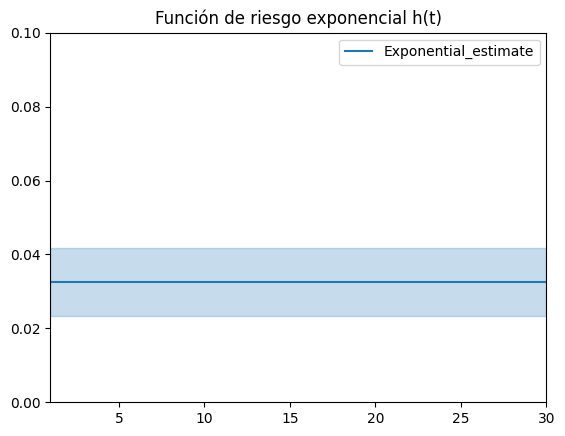

In [ ]:
# Gráfica de la función de riesgo exponencial
M_Exp.plot_hazard()
plt.title('Función de riesgo exponencial h(t)')
plt.xlim(1,30)
plt.ylim(0,0.1);

In [ ]:
# ¿Cuáles  el  riesgo  de  que una empresa  quiebre  según  la  función exponencial?
M_Exp.hazard_.head()

,Exponential_estimate
1.000000,0.032498
1.292929,0.032498
1.585859,0.032498
1.878788,0.032498
2.171717,0.032498


El riesgo de que una empresa quiebre, según la función exponencial, es de 3.2498%

## Modelo Weibull

In [ ]:
M_Weibull=WeibullFitter().fit(Quiebra['tiempo'],Quiebra['quebrar'])

In [ ]:
M_Weibull.print_summary()

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 100 total observations, 52 right-censored observations>
   number of observations = 100
number of events observed = 48
           log-likelihood = -204.61
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  25.46       2.26            21.03            29.89
rho_      1.69       0.20             1.30             2.09

          cmp to     z      p   -log2(p)
lambda_     1.00 10.83 <0.005      88.36
rho_        1.00  3.44 <0.005      10.73
---
AIC = 413.22

<Axes: >

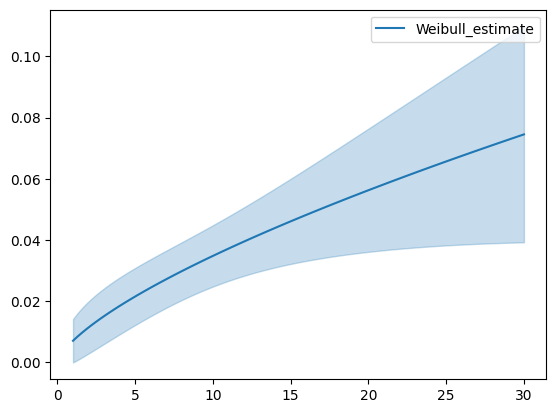

In [ ]:
# Grafique la función de riesgo
M_Weibull.plot_hazard()

¿Qué forma tiene la función de riesgo? y ¿qué significa?

Tiene una forma creciente, lo que nos indica que el riesgo de que quiebre la empresa aumenta a medida que avanza el tiempo.

## Modelo Log-Normal

In [ ]:
M_LogN=LogNormalFitter().fit(Quiebra['tiempo'],Quiebra['quebrar'])

In [ ]:
M_LogN.print_summary()

<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 100 total observations, 52 right-censored observations>
   number of observations = 100
number of events observed = 48
           log-likelihood = -210.44
               hypothesis = mu_ != 0, sigma_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%
mu_      3.02       0.13             2.78             3.27
sigma_   0.99       0.10             0.79             1.19

         cmp to     z      p   -log2(p)
mu_        0.00 24.04 <0.005     421.80
sigma_     1.00 -0.11   0.91       0.14
---
AIC = 424.87

<Axes: >

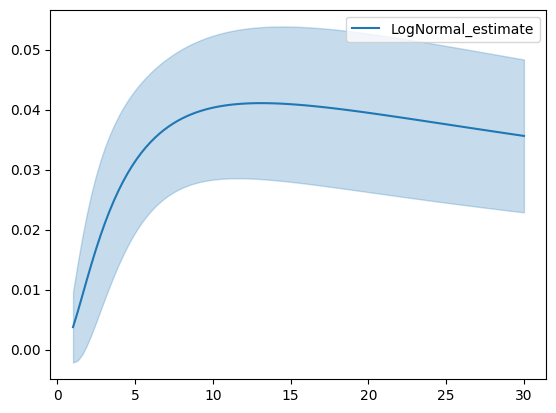

In [ ]:
# Grafique la función de riesgo
M_LogN.plot_hazard()

In [ ]:
Df_Riesgo_LogN=pd.DataFrame(M_LogN.hazard_)

In [ ]:
Df_Riesgo_LogN.head()

,LogNormal_estimate
1.000000,0.003749
1.292929,0.006219
1.585859,0.008870
1.878788,0.011543
2.171717,0.014143


In [ ]:
Df_Riesgo_LogN[Df_Riesgo_LogN['LogNormal_estimate']==np.max(Df_Riesgo_LogN['LogNormal_estimate'])]

,LogNormal_estimate
13.010101,0.041069


En qué periodo el riesgo de quebrar es creciente y en cuál decreciente

Antes de los 13 años, el riesgo de quebrar es creciente. Después de los 13 años, el riesgo de quebrar es decreciente.

## Modelo Kaplan-Meier

In [ ]:
M_KaplanM=KaplanMeierFitter().fit(Quiebra['tiempo'],Quiebra['quebrar'])

Text(0.5, 1.0, 'Función de supervivencia')

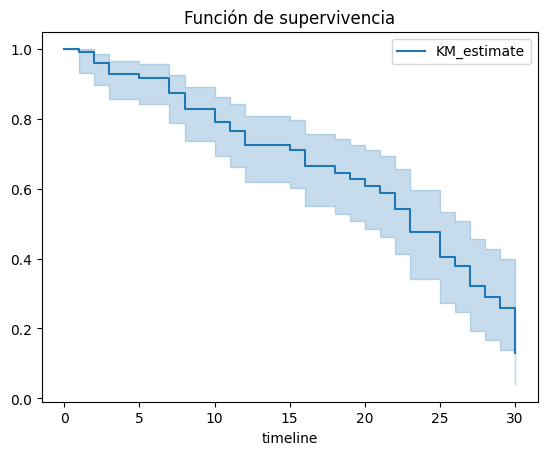

In [ ]:
# Estime   la   función   de   supervivencia   y   la   mediana   de   tiempo   de supervivencia y diga que significa.
M_KaplanM.plot_survival_function()
plt.title('Función de supervivencia')

In [ ]:
# Estime   la   función   de   supervivencia   y   la   mediana   de   tiempo   de supervivencia y diga que significa.
M_KaplanM.median_survival_time_

23.0

La mediana de tiempo de supervivencia es de 23 años, por lo que podemos decir que la mitad de las empresas, quiebran antes de los 23 años, mientras que la otra mitad durá más de los 23 años.

In [ ]:
# Estime  la  función  de  supervivencia  por  Kaplan-meier  para  hombres  y mujeres  y  grafique  con .plot_survival_function(ci_show=False)y  diga  si  las empresas administradas por hombres/mujeres quiebran más rápido. No olvide etiquetar cada línea y agregar todos los elementos en cada gráfica.
M_Hombres=Quiebra.query('mujer==0')
M_Mujeres=Quiebra.query('mujer==1')
KM_H=KaplanMeierFitter().fit(M_Hombres['tiempo'],M_Hombres['quebrar'])
KM_M=KaplanMeierFitter().fit(M_Mujeres['tiempo'],M_Mujeres['quebrar'])

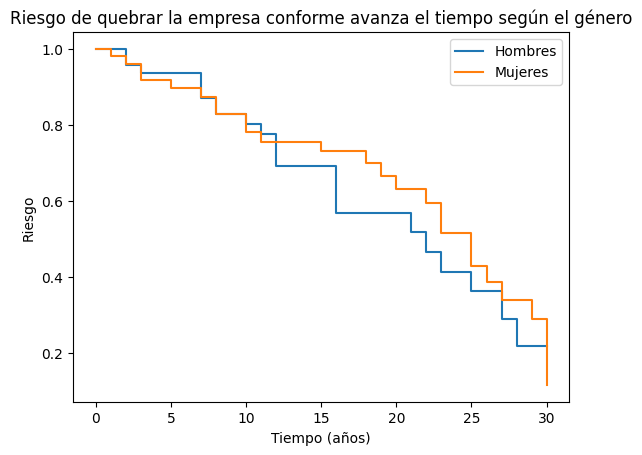

In [ ]:
KM_H.plot_survival_function(ci_show=False,label="Hombres")
KM_M.plot_survival_function(ci_show=False,label="Mujeres")
plt.title("Riesgo de quebrar la empresa conforme avanza el tiempo según el género")
plt.xlabel("Tiempo (años)")
plt.ylabel("Riesgo")
plt.show()

A primera vista observamos que pareciese que las mujeres tienden a tener riesgos ligeramente más altos por un tiempo más prolongado. Por lo que vemos también que los hombres suelen quebrar más rápido.

In [ ]:
# El profesor cree que las empresas fundadaspor hombres quiebran más rápido,   refute   o   confirme   con   evidencia   estadística   tal   afirmación (pruebas de hipótesis, graficas, tablas etc.)

## Prueba de hipótesis (long-rank-test)

$Ho: S(1)=S(2)$

$Ha: S(1)\neq S(2)$

In [ ]:
from lifelines.statistics import logrank_test
LRT=logrank_test(M_Hombres['tiempo'],M_Mujeres['tiempo'],M_Hombres['quebrar'],M_Mujeres['quebrar'])

In [ ]:
LRT.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.28 0.59      0.75

In [ ]:
LRT.p_value.round(2)

0.59


Dado que el p-value>alpha, no rechazamos Ho. Por lo que podemos concluir que ambas funciones de supervivencia son iguales, debido a ello se puede decir que las empresas fundadas por hombres o por mujeres tienen el mismo riesgo de quebrar.